In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns


In [3]:
nodes_list = [1,2,3,4,5,6,7,8,9]
edge_list_full = [(1,2),(1,3),(1,5),(1,7),(2,9),(2,6),(3,5),(3,8),(4,8),(4,6),(4,7),(5,9),(6,7),(6,8),(6,9),(7,3),(8,2),(8,9)]

full_net = nx.Graph()
full_net.add_nodes_from(nodes_list)
full_net.add_edges_from(edge_list_full)


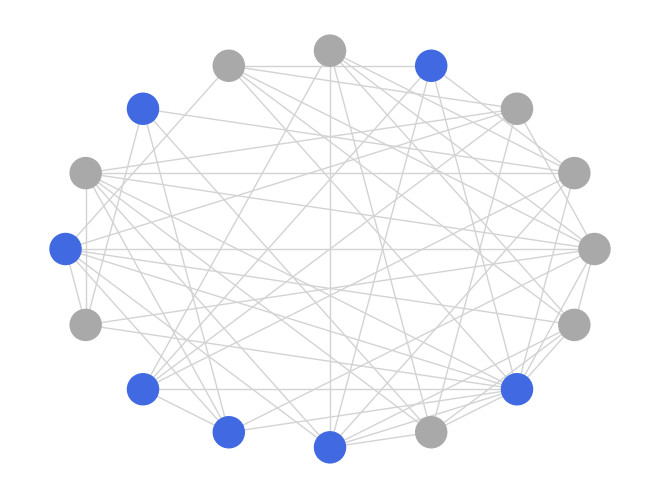

In [46]:
num_nodes = 16
G = nx.gnp_random_graph(num_nodes, 0.4)  # Probability 0.5 for edge creation

# # Assign colors to nodes
# node_colors = ['darkgray'] * (num_nodes // 2) + ['royalblue'] * (num_nodes // 2)
# random.shuffle(node_colors)  # Shuffle to randomize color assignment
# Assign colors to nodes based on their cluster
colors = ['darkgray', 'royalblue']
node_colors = random.choices(colors, k=16)

# Draw the graph
# pos = nx.spring_layout(G)  # Layout for positioning nodes
# pos = nx.arf_layout(G)  # Layout for positioning nodes
pos = nx.shell_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='lightgray')

# Display the plot
plt.savefig("connected_net.png",dpi=1000)
plt.show()


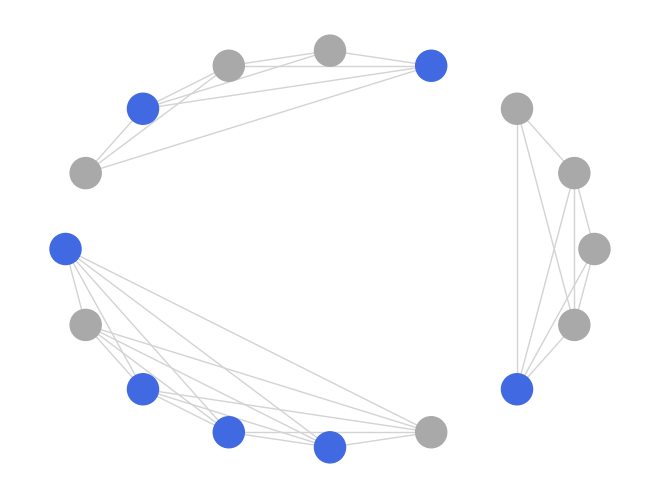

In [47]:
sizes = [6, 5, 5]

# Define the probability matrix for intra-cluster and inter-cluster edges
p_intra = 0.9  # Probability of edges within the same cluster
p_inter = 0.0  # Probability of edges between different clusters

p = [
    [p_intra, p_inter, p_inter],
    [p_inter, p_intra, p_inter],
    [p_inter, p_inter, p_intra]
]

# Create the stochastic block model
Gc = nx.stochastic_block_model(sizes, p, seed=42)


# Draw the graph
# pos = nx.spring_layout(Gc, k=0.2)  # Layout for positioning nodes
pos = nx.shell_layout(Gc)
nx.draw(Gc, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='lightgray')

# Save the figure as a PNG file
plt.savefig("clustered_net.png",dpi=1000)

# Display the plot
plt.show()

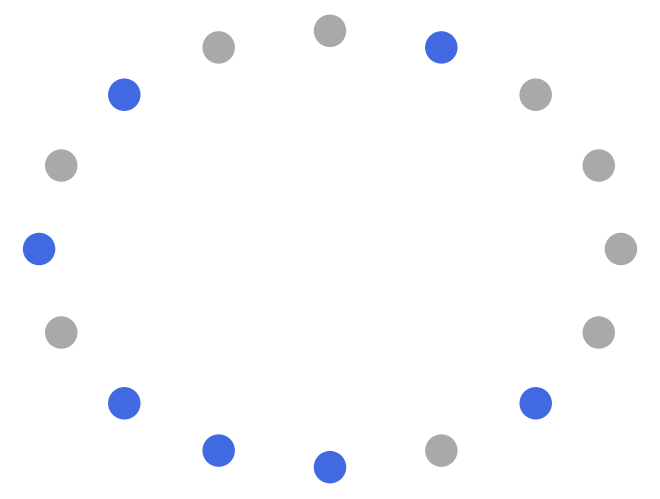

In [48]:
num_nodes = 16
Ge = nx.gnp_random_graph(num_nodes, 0)  # Probability 0.5 for edge creation

# Draw the graph
# pos = nx.spring_layout(G)  # Layout for positioning nodes
# pos = nx.arf_layout(G)  # Layout for positioning nodes
pos = nx.shell_layout(Ge)  # Layout for positioning nodes
nx.draw(Ge, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='lightgray')

# Display the plot
plt.savefig("empty_net.png",dpi=1000)
plt.show()


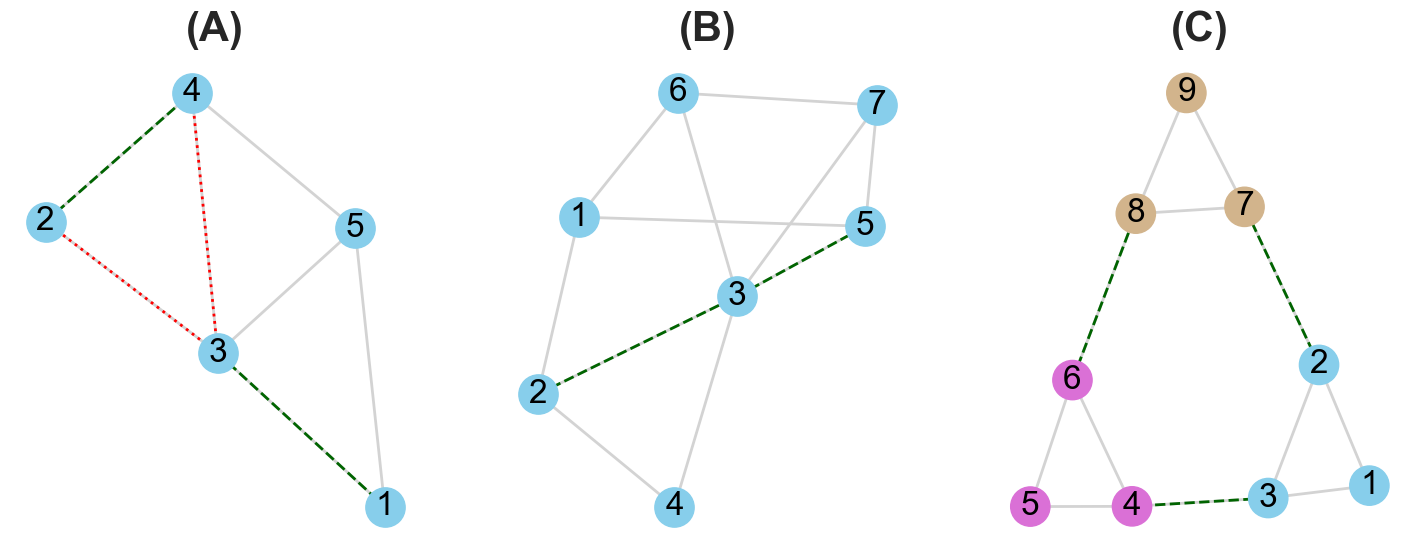

In [76]:

# Create figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6.5))

# Define colors
node_color = 'skyblue'
# node_color = '#B0E0E6'
edge_color = 'lightgray'
highlight_color = 'darkgreen'
remove_color = 'red'

# (A) Network with some edges that need to be removed (red) or missing (green)
G_A = nx.Graph()
edges_A = [(1, 3), (3, 4), (4, 5), (5, 1), (3, 5), (2, 3), (2, 4)]
# edges_A = [(4, 5), (5, 1), (3, 5)]
# edges_A = [(4, 5), (5, 1), (3, 5)]
# edges_A_red = [(2, 3),(3, 4)]
edges_A_red = [(2, 3),(3, 4)]
edges_A_green = [(1, 3),(2,4)]
# edges_A_grey =
G_A.add_edges_from(edges_A)

pos_A = nx.spring_layout(G_A)
nx.draw(G_A, pos_A, ax=axs[0], with_labels=True, node_color=node_color, edge_color=edge_color, node_size=800, font_size=24, width=2)

# Red edges
nx.draw_networkx_edges(G_A, pos_A, edgelist=[(2, 3),(3,4)], edge_color=remove_color, style='dotted', ax=axs[0], width=2)
# Green edges
nx.draw_networkx_edges(G_A, pos_A, edgelist=[(3, 1),(2,4)], edge_color=highlight_color, style='dashed', ax=axs[0], width=2)

axs[0].set_title("(A)", fontsize=30, fontweight="bold")

# (B) Network with edge censoring at 3 edges (node 3 has maximal 3 edges)
G_B = nx.Graph()
# edges_B = [(1, 2), (1, 5), (2, 3), (3, 4), (3, 6), (3, 5), (3, 7), (6, 7)]
# edges_B = [(1, 2), (1, 5), (3, 4), (3, 6), (3, 7), (6, 7), (1,6), (5, 7), (4,2)]
edges_B = [(1, 2), (1, 5), (3, 4), (3, 6), (3, 7), (6, 7), (1,6), (5, 7), (4,2), (2, 3), (3, 5)]
edges_B_green = [(2, 3), (3, 5)]
G_B.add_edges_from(edges_B)

pos_B = nx.spring_layout(G_B)
nx.draw(G_B, pos_B, ax=axs[1], with_labels=True, node_color=node_color, edge_color=edge_color, node_size=800, font_size=24, width=2)

# Green edges
nx.draw_networkx_edges(G_B, pos_B, edgelist=edges_B_green, edge_color=highlight_color, style='dashed', ax=axs[1], width=2)

axs[1].set_title("(B)", fontsize=30, fontweight="bold")

# (C) Clusters with some connection between clusters
G_C = nx.Graph()
# edges_C = [(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (7, 8), (8, 9), (9, 7), (3, 4), (6, 8), (2, 7)]
edges_C = [(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (7, 8), (8, 9), (9, 7), (3, 4), (6, 8), (2, 7)]
edges_C_green = [(3, 4), (6, 8), (2, 7)]
G_C.add_edges_from(edges_C)

# Define groups of nodes
group_1 = [1, 2, 3]   # Group 1 nodes
group_2 = [4, 5, 6]   # Group 2 nodes
group_3 = [7, 8, 9]   # Group 3 nodes

# Define colors from Seaborn pastel palette
colors = sns.color_palette("pastel", n_colors=3)
colors = ['skyblue', 'orchid', 'tan']
node_colors =  ['gray' for _ in range(G_C.number_of_nodes())]

# Color nodes based on their group
for idx, node in enumerate(G_C.nodes()):
    if node in group_1:
        node_colors[idx] = colors[0]  # Color for group 1
    elif node in group_2:
        node_colors[idx] = colors[1]  # Color for group 2
    elif node in group_3:
        node_colors[idx] = colors[2]  # Color for group 3


pos_C = nx.spring_layout(G_C)
nx.draw(G_C, pos_C, ax=axs[2], with_labels=True, node_color=node_colors, edge_color=edge_color, node_size=800, font_size=24, width=2, alpha=1)

# Green edges
nx.draw_networkx_edges(G_C, pos_C, edgelist=edges_C_green, edge_color=highlight_color, style='dashed', ax=axs[2], width=2, alpha=1)

axs[2].set_title("(C)", fontsize=30, fontweight="bold")

plt.savefig("diff_net_misspec.png",dpi=1000)
plt.show()